## Task-D: Collinear features and their effect on linear models

In [18]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('task_d.csv')

In [20]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [21]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [22]:
data=pd.read_csv('task_d.csv')

X=data.drop(['target'],axis=1)
y=data['target']

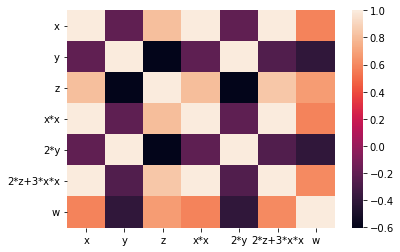

In [23]:
import seaborn as sns

sns.heatmap(X.corr())

Lighter colour==>more positive Correlation
Darker colour==> more negative correlation

Logistic Regression

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


grid_search = GridSearchCV(
    
    LogisticRegression(),
    {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
    n_jobs = -1,
    cv=5,
)

grid_search.fit(X, y)
grid_search.best_params_

{'C': 0.0001}

In [28]:
from sklearn.metrics import accuracy_score

log_reg=LogisticRegression(C=0.0001)

log_reg.fit(X,y)
preds=log_reg.predict(X)
print(f'accuracy:{accuracy_score(y,preds)}')
log_reg.coef_

accuracy:1.0


array([[ 0.0035963 , -0.00341973,  0.00479983,  0.00355269, -0.00341973,
         0.00377695,  0.00316971]])

The Model is Getting Overfit

In [29]:
X_=X+np.random.normal(-1,1,X.shape)


In [30]:
log_reg_perturbed=LogisticRegression(C=0.001)
log_reg_perturbed.fit(X_,y)
preds=log_reg_perturbed.predict(X_)
print(f'accuracy:{accuracy_score(y,preds)}')
log_reg_perturbed.coef_

accuracy:0.98


array([[ 0.03230513, -0.02952848,  0.04699423,  0.03662661, -0.03704956,
         0.03360366,  0.02040025]])

The Variance Got Reduced

In [31]:
(log_reg.coef_ - log_reg_perturbed.coef_)

array([[-0.02870883,  0.02610875, -0.0421944 , -0.03307391,  0.03362983,
        -0.02982671, -0.01723054]])

**SVM**

In [34]:
from sklearn.svm import SVC
grid_search=GridSearchCV(
    SVC(kernel='linear'),
    {'C':[0.0001,0.001,0.01,0.1,1,10,100]},
    n_jobs=-1,
    cv=5
)

grid_search.fit(X,y)

grid_search.best_params_

{'C': 0.01}

In [35]:
svc=SVC(C=0.01,kernel='linear')

svc.fit(X,y)
preds=svc.predict(X)
print(f'accuracy:{accuracy_score(y,preds)}')
svc.coef_

accuracy:1.0


array([[ 0.16231443, -0.21809058,  0.35982752,  0.15193189, -0.21809058,
         0.18018286,  0.1470533 ]])

In [36]:
svc_perturbed=SVC(C=0.01,kernel='linear')
svc_perturbed.fit(X_,y)
preds=svc_perturbed.predict(X_)
print(f'accuracy:{accuracy_score(y,preds)}')
svc_perturbed.coef_

accuracy:0.96


array([[ 0.15635294, -0.15637117,  0.24667513,  0.18785588, -0.27050807,
         0.18970349,  0.09640801]])

In [37]:
(svc.coef_-svc_perturbed.coef_)

array([[ 0.00596149, -0.06171942,  0.11315239, -0.03592399,  0.05241749,
        -0.00952062,  0.05064529]])